In [2]:
import sys,os
sys.path.append("../TI_modules/")
import TI_greensfn_parallel as TI_greensfn
%pylab notebook
import time
import multiprocessing as mp
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        
from mpl_toolkits.axes_grid1 import make_axes_locatable

Populating the interactive namespace from numpy and matplotlib


In [2]:
sb=TI_greensfn.init_material(npix=64,pixwid=0.5e-9)

<IPython.core.display.Javascript object>


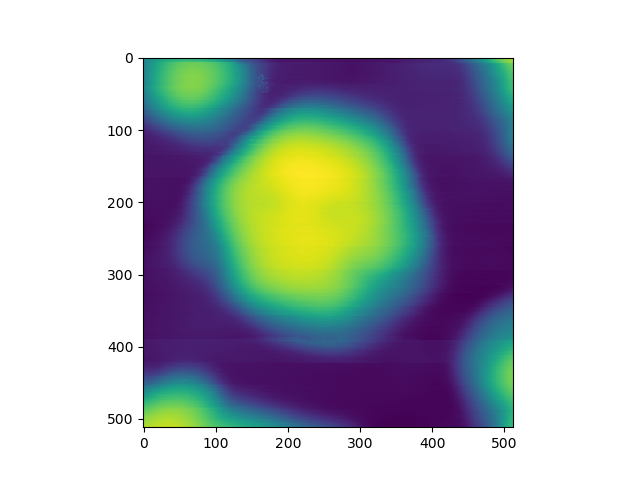

In [3]:
im=np.loadtxt("../../../Data/STM_raw_data/4K/Aug2018/18h08/18h08T0008.txt")
figure()
imshow(im)

<IPython.core.display.Javascript object>


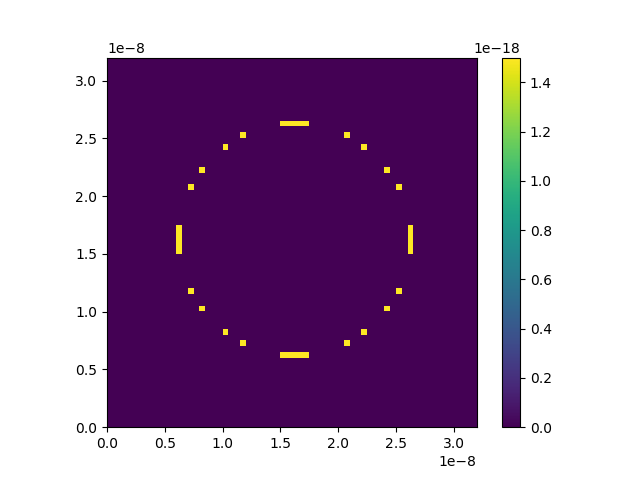

In [3]:
sb.setup_potential(rad=10e-9,po_type="circ",V0=6.,edgewid=0.01,smwid=0.0)

figure()
imshow(real(sb.V),origin="lower",extent=[0.0 , sb.npix*sb.pixwid, 0.0 , sb.npix*sb.pixwid])
colorbar()
#savefig(figpath+"80px10nm54sitespot.pdf",bbox_inches="tight")

In [4]:
(sb.Vall.trace()*6e18)/2

(324.00000000000011+0j)

In [15]:
start=time.time()
LdosG0T=sb.get_ldos_Gnew(method="T",E=0.144)
print time.time()-start
# start=time.time()
# LdosG=sb.get_ldos_Gnew(method="S",E=0.18)
# print time.time()-start

4.99438595772


<IPython.core.display.Javascript object>


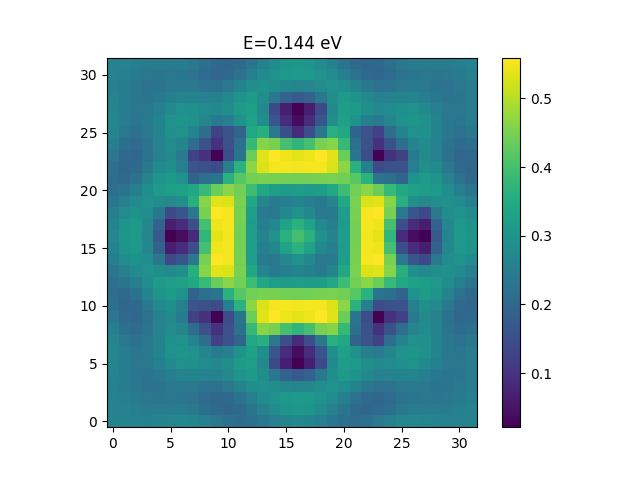

In [17]:
fn="atoms"
figpath="../results/figures/"+fn
ensure_dir(figpath)
figure()
title("E=0.144 eV")
imshow((LdosG0T),origin="lower")
savefig(figpath+"32px10nm20sitesldos.pdf",bbox_inches="tight")
colorbar()
# figure()
# imshow((LdosG))
# colorbar()
# figure()
# imshow(abs(LdosG0T-LdosG))
# colorbar()

In [5]:
def run_fn(E):
    ldos=sb.get_ldos_Gnew(E=E,method="T",loc=[])
    return ldos

def run_ldos_in_parallel(numprocs,Emin,Emax,nstep):
    E=np.linspace(Emin,Emax,nstep)
    pool=mp.Pool(processes=numprocs)
    ldos=pool.map(run_fn,E)
    pool.close()
    pool.join()
    return E,ldos

In [ ]:
start=time.time()
E,ldos=run_ldos_in_parallel(4,-0.2,0.2,20)
ldos=np.array(ldos)
print time.time()-start

Process PoolWorker-3:
Traceback (most recent call last):
  File "/Users/garima/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/garima/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/garima/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/multiprocessing/pool.py", line 113, in worker
    result = (True, func(*args, **kwds))
  File "/Users/garima/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/multiprocessing/pool.py", line 65, in mapstar
    return map(*args)
  File "<ipython-input-5-5c7c994c6c82>", line 2, in run_fn
    ldos=sb.get_ldos_Gnew(E=E,method="T",loc=[])
  File "../TI_modules/TI_greensfn_parallel.py", line 217, in get_ldos_Gnew
    G=self.get_Gnew_fromT(E=E)
  File "../TI_modules/TI_greensfn_parallel.py", line 210, in get_Gnew_fromT
    G0TG0=np.matmul(G0all[:,nz_idx],TG

<IPython.core.display.Javascript object>


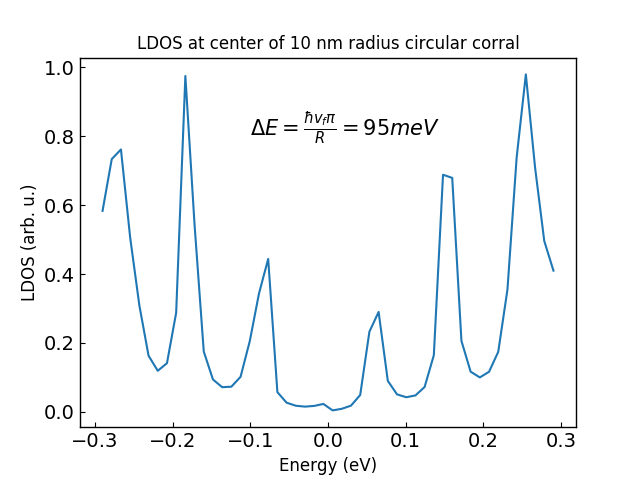

In [24]:
fn="atoms"
figpath="../results/figures/"+fn
ensure_dir(figpath)
figure()
title("LDOS at center of 10 nm radius circular corral")
plot(E,ldos)
text(-0.1, 0.8, r'$\Delta E=\frac{\hbar v_f \pi}{R} =95 meV$', fontsize=15)
ylabel("LDOS (arb. u.)",fontsize=12)
xlabel("Energy (eV)",fontsize=12)
rc('axes', linewidth=1)
#grid()
#xticks(numpy.arange(-0.25, 0.25, 0.05))
tick_params(direction="in")
tick_params(labelsize=14)
savefig(figpath+"32px10nm20sites.pdf",bbox_inches="tight")

In [18]:
def linescan(slope=1.,intrcpt=0.,npix=sb.npix): 
#'''given the slope and intercept of linescan, this function returns the pixel coordinates'''
    a= []
    b=[]
    for x in linspace(0,npix,4*npix):
        i=int(x)
        j=np.int(np.floor(slope*x+intrcpt))
        if j in range(npix):
            a.append(i)
            b.append(j) 
        loc=set(zip(a,b))
        loc=list(loc)
    return loc
        
# V=np.zeros((sb.npix,sb.npix))
# for x in range(size(i)):
#     V[i[x],j[x]]=1.
# figure()
# imshow(V*3e-18+real(sb.V),origin="lower")
        
figure()
loc=linescan()
for x in range(len(loc)):
    plot(E,ldos[:,loc[x][0],loc[x][1]])

<IPython.core.display.Javascript object>

IndexError: too many indices for array

In [24]:
(sb.hbarev*sb.vf*np.pi)/(1e-8)

0.09512036339310706

In [37]:
fn="atoms"
figpath="../results/figures/"+fn
ensure_dir(figpath)


jpegpath=figpath + "/jpeg/"
ensure_dir(jpegpath)

ioff()
for i,omega in enumerate(E):
    fig,(ax1,ax2)=subplots(ncols=2,figsize=(9,3))
    img1 = ax1.imshow(real(sb.V)/(sb.pixwid**2.),origin="lower")
    ax1.set_title(r"V (eV)")
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.08)
    fig.colorbar(img1, cax=cax1)

    img2 = ax2.imshow(ldos[i,],origin="lower")
    ax2.set_title(r"$\epsilon=$" + str(round(omega,2)) + " eV")
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.08)
    cbar=fig.colorbar(img2, cax=cax2)
    cbar.formatter.set_powerlimits((0,0))
    cbar.update_ticks()
    filename=jpegpath + "ldos_" + str(i).zfill(2) + ".jpeg"
    savefig(filename,bbox_inches="tight")

workdir=os.getcwd()
os.chdir(figpath)
cmd="convert -quality 99 -density 150 -delay 100 -loop 0 ./jpeg/ldos_*.jpeg ldos_evolve.gif"
print cmd
os.system(cmd)
os.chdir(workdir)
ion()

convert -quality 99 -density 150 -delay 100 -loop 0 ./jpeg/ldos_*.jpeg ldos_evolve.gif
